In [221]:
!pip install -U scikit-learn

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [233]:
# randomseed
np.random.seed(0)

#data_generation v & x
v = np.random.normal(25, 8, 200)
#v = np.full((100,),25)
x = np.linspace(10, 80, len(v))
x_rad = x*((np.pi/180))

data = np.column_stack((v,x))

# data_set: hight = (v^2*(sin(x))^2)/(2*9.8)
height = (v**2 * (np.sin(x_rad))**2) / (2 * 9.8)

# data_set: distance = (v^2*(sin(2*x)))/(9.8)
distance = (v**2 * np.sin(2*x_rad)) / 9.8

value = np.column_stack((distance,height))

# splitting dataset to training set and testing set 
data_train, data_test, value_train, value_test = train_test_split(data, value, test_size=0.2, random_state=42)


In [220]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# model = Sequential([
#     Dense(1, input_shape=(1,), activation='linear')
# ])

model = Sequential([
    Dense(2, input_shape=(2,), activation='relu'),
    Dense(4, activation='relu'),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(2, )
])

# create a model
model.compile(optimizer=Adam(learning_rate=0.007), loss='mse', metrics='accuracy')


In [221]:
history = model.fit(data_train, value_train, validation_split = 0.2, epochs=200, batch_size=2)

Epoch 1/200
64/64 [==============================] - 1s 6ms/step - loss: 2276.9043 - accuracy: 0.1719 - val_loss: 593.4205 - val_accuracy: 0.8438
Epoch 2/200
64/64 [==============================] - 0s 3ms/step - loss: 620.5178 - accuracy: 0.9453 - val_loss: 720.5522 - val_accuracy: 0.8438
Epoch 3/200
64/64 [==============================] - 0s 3ms/step - loss: 365.5201 - accuracy: 0.9297 - val_loss: 308.1485 - val_accuracy: 0.8438
Epoch 4/200
64/64 [==============================] - 0s 3ms/step - loss: 328.7660 - accuracy: 0.9297 - val_loss: 199.2571 - val_accuracy: 0.8750
Epoch 5/200
64/64 [==============================] - 0s 3ms/step - loss: 290.5135 - accuracy: 0.9141 - val_loss: 153.9931 - val_accuracy: 0.8438
Epoch 6/200
64/64 [==============================] - 0s 3ms/step - loss: 276.6211 - accuracy: 0.8906 - val_loss: 152.0279 - val_accuracy: 0.8438
Epoch 7/200
64/64 [==============================] - 0s 3ms/step - loss: 284.1528 - accuracy: 0.9219 - val_loss: 179.1261 - val_a

2/2 [==============================] - 0s 3ms/step - loss: 9.9681 - accuracy: 0.9500


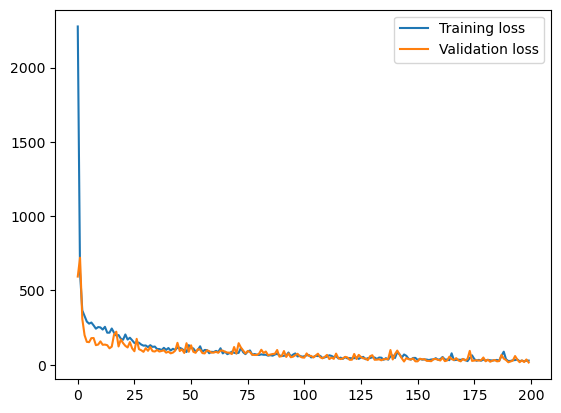

In [222]:
#evaluate model
model.evaluate(data_test, value_test)

#drawing training history
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

5/5 [==============================] - 0s 2ms/step


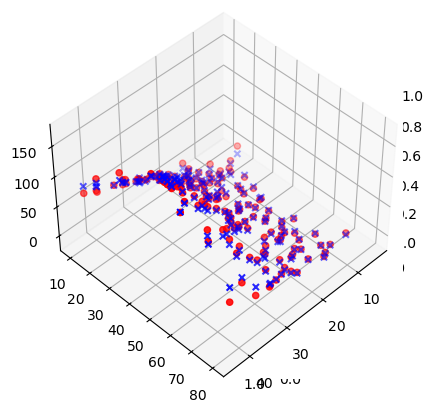

In [223]:
#drawing pictures
def three_dimension_picture_distance(data_set, data_consequences, value_set):
    fig = plt.figure()
    plt.axes(projection='3d')
    ax = fig.add_subplot(111, projection='3d') 
    ax.view_init(45, 45)
    x = data_set[:,0]
    y = data_set[:,1]
    z = value_set[:,0]
    ax.scatter(x, y, z, color='red', label='Actual values')
    z = data_consequences[:,0]
    ax.scatter(x, y, z, color='blue', marker='x', label='Predict')

def three_dimension_picture_(data_set, data_consequences, value_set):
    fig = plt.figure()
    plt.axes(projection='3d')
    ax = fig.add_subplot(111, projection='3d') 
    ax.view_init(45, 45)
    x = data_set[:,0]
    y = data_set[:,1]
    z = value_set[:,0]
    ax.scatter(x, y, z, color='red', label='Actual values')
    z = data_consequences[:,0]
    ax.scatter(x, y, z, color='blue', marker='x', label='Predict')
    
three_dimension_picture_distance(data_train,model.predict(data_train),value_train)
three_dimension_picture_height(data_train,model.predict(data_train),value_train)


In [224]:
data_train

array([[25.44932274, 37.78894472],
       [31.58803323, 79.29648241],
       [21.90138546, 23.36683417],
       [43.15803699, 18.44221106],
       [27.38590539, 52.91457286],
       [23.62762935, 78.59296482],
       [36.75487016, 20.20100503],
       [18.16723409, 16.68341709],
       [30.0802515 , 60.30150754],
       [34.43023657, 40.25125628],
       [22.85597303, 50.10050251],
       [19.79179525, 70.85427136],
       [17.18177696, 11.75879397],
       [21.51877159, 54.32160804],
       [23.75991926, 51.15577889],
       [15.12139344, 35.67839196],
       [13.06993926, 59.24623116],
       [26.01529674, 44.47236181],
       [31.8546449 , 70.50251256],
       [25.08400017, 43.76884422],
       [27.5355409 , 69.44723618],
       [39.28696395, 44.12060302],
       [28.02530016, 20.90452261],
       [31.0883018 , 14.22110553],
       [26.25079175, 22.31155779],
       [32.37765337, 51.85929648],
       [11.34983847, 24.77386935],
       [37.34411676, 76.48241206],
       [21.77458442,

In [226]:
model.predict(data_train)

5/5 [==============================] - 0s 2ms/step


array([[ 65.25133   ,  11.387222  ],
       [ 41.88534   ,  49.562668  ],
       [ 39.373592  ,   4.2724147 ],
       [107.01855   ,  17.274157  ],
       [ 72.87312   ,  27.98432   ],
       [ 20.649353  ,  30.56373   ],
       [ 84.1846    ,  11.912497  ],
       [ 15.972311  ,   0.29554653],
       [ 73.5594    ,  38.76034   ],
       [129.15912   ,  24.926971  ],
       [ 53.18105   ,  17.97415   ],
       [ 23.133204  ,  20.463804  ],
       [  3.157286  ,  -1.9607105 ],
       [ 43.015163  ,  15.621681  ],
       [ 56.787907  ,  20.19724   ],
       [ 22.996088  ,   4.605229  ],
       [ 16.514177  ,   6.878593  ],
       [ 71.840065  ,  21.434265  ],
       [ 60.86656   ,  47.089455  ],
       [ 67.90945   ,  19.372705  ],
       [ 43.671227  ,  35.39073   ],
       [164.6548    ,  43.673874  ],
       [ 51.790447  ,   5.552256  ],
       [ 46.793156  ,   5.183865  ],
       [ 49.571438  ,   5.3886733 ],
       [ 97.39233   ,  36.942097  ],
       [  3.3079245 ,   2.4826694 ],
 

In [234]:
#showing the consequences
v_t = np.array([30])
x_t = np.array([45])
x_rad_t = x_t*((np.pi/180))
distance_t = (v_t**2 * np.sin(2*x_rad_t)) / 9.8
height_t = (v_t**2 * (np.sin(x_rad_t))**2) / (2 * 9.8)
print(model.predict(np.array([[30,45]])))
distance_t, height_t




1/1 [==============================] - 0s 22ms/step
[[86.67532  22.928946]]


(array([91.83673469]), array([22.95918367]))

2/2 [==============================] - 0s 4ms/step


ValueError: x and y must be the same size

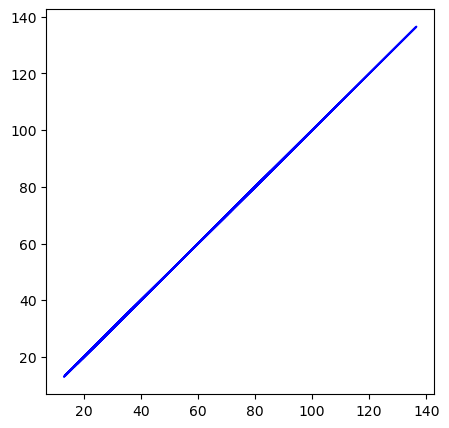

In [228]:
def plot_scatter (x, y, title, x_label, y_label,n):
    # plt.subplot(2, 2, n);
    plt.figure(figsize=(5, 5));
    plt.plot(x, x, color="blue", label="d")
    plt.scatter(x, y, marker="x", color="red")
    # plt.axis((0,210, 0,210))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

distance_pred = model.predict(data_test)
plot_scatter(distance_test, distance_pred, "Testing set", "True value", "Pred. value",1)

distance_pred = model.predict(data_train)
plot_scatter(distance_train, distance_pred, "Training set", "True value", "Pred. value",2)

print(len(distance_pred),len(data_test))